In [1]:
import gym_gvgai
import gym

In [2]:
import sys
import numpy as np
import pandas as pd
from collections import defaultdict

In [3]:
env = gym_gvgai.make('gvgai-zelda-lvl3-v0')

Connecting to host 127.0.0.1 at port 41007 ...
Client connected to server [OK]


In [4]:
def e_greedy_policy_creation(Qstate, epsilon, nA):
    """
    Q: Our Q table. 
      Q[state] = numpy.array
      Q[state][action] = float.
    epsilon: small value that controls exploration.
    nA: the number of actions available in this environment
    
    return: an epsilon-greedy policy specific to the state.
    """
    
    policy = np.ones(nA) * epsilon/nA
    policy[np.argmax(Qstate)] = 1 - epsilon + (epsilon / nA)        
    return policy

def choose_action(policy, env):
    return np.random.choice(np.arange(env.nA), p=policy)

def sarsa(env, num_episodes, alpha, gamma=1.0, fixedEpsilon = False):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes

    for i_episode in range(1, num_episodes+1): 
        state = env.reset()
        #To see the policy from the book, keep epsilon fixed at 0.1
        epsilon = 0.1 if fixedEpsilon else 1.0 / i_episode
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush() 
        done = False
        policy = e_greedy_policy_creation(Q[state], epsilon, env.nA)    
        action = choose_action(policy, env)
        while not done:
            sPrime, reward, done, info = env.step(action)
            policySPrime = e_greedy_policy_creation(Q[sPrime], epsilon, env.nA)
            aPrime = choose_action(policySPrime, env)
            Q[state][action] += alpha * (reward + (gamma * Q[sPrime][aPrime]) - Q[state][action])
            state, action = sPrime, aPrime
    return Q

In [5]:
x = env.reset()

In [6]:
import matplotlib.pyplot as plt

In [7]:
from base import Generator

In [8]:
MECHANICS = ['+', 'g']

In [9]:
def initialize(path):
    f = open(path, 'r')
    f = f.readlines()
    rep = []
    for l in f: 
        rep.append(l[:-1])
    mat = []
    for r in rep:
        for s in r:
            mat.append(s)
    npa = np.array(mat).reshape((9, -1))
    return npa

In [10]:
gen = Generator(initialize('zelda_lvl3.txt'), MECHANICS)

In [11]:
pd.DataFrame(gen.world)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,w,w,w,w,w,w,w,w,w,w,w,w,w
1,w,.,.,.,.,.,.,.,.,.,.,g,w
2,w,.,.,.,.,w,.,.,.,.,.,.,w
3,w,.,w,.,w,.,.,1,.,.,.,.,w
4,w,+,w,.,.,.,.,.,.,.,.,.,w
5,w,w,1,.,.,2,.,.,3,.,.,.,w
6,w,.,.,w,.,.,w,.,w,.,w,.,w
7,w,.,.,.,A,.,.,.,.,.,.,.,w
8,w,w,w,w,w,w,w,w,w,w,w,w,w


In [12]:
gen.mutate(0.2)

In [13]:
pd.DataFrame(gen.world)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,w,w,w,w,w,w,w,w,w,w,w,w,w
1,w,.,.,.,.,.,.,.,.,.,.,g,w
2,w,.,.,.,.,w,.,.,.,.,.,.,w
3,w,.,w,.,w,.,.,1,.,.,.,.,w
4,w,+,w,.,.,.,.,.,.,.,.,.,w
5,w,w,1,.,.,2,.,.,3,.,.,.,w
6,w,.,.,w,.,.,w,.,w,.,w,.,w
7,w,.,.,.,A,.,.,.,.,.,.,.,w
8,w,w,w,w,w,w,w,w,w,w,w,w,w


In [14]:
with open("test.txt", 'w+') as fname:
    fname.write(str(gen))

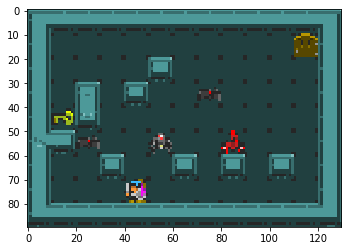

In [15]:
plt.imshow(x) # original env

In [16]:
env.unwrapped._setLevel("test.txt")

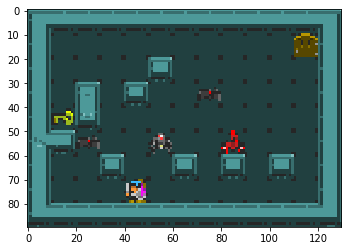

In [17]:
plt.imshow(env.reset()) # mutated environment

In [19]:
p2 = Generator(initialize("test.txt"), MECHANICS)

In [20]:
gen.mutate(0.3)

In [21]:
child = gen.crossOver(p2)

In [22]:
with open("child.txt", 'w+') as fname:
    fname.write(str(child))

In [23]:
env.unwrapped._setLevel("child.txt")

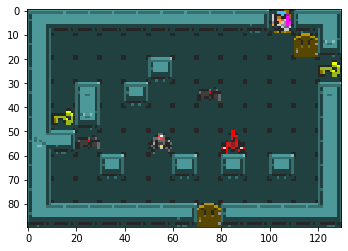

In [24]:
plt.imshow(env.reset()) # after crossover environment